# Statistical Tests

This notebook is used to complement that stats.ipynb notebook.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols, rlm
from scipy.stats import linregress
from IPython.display import display

from plot_funcs import (get_results, plot_avg_ranks,
                        clean_model_names, get_ranks_sizes,
                        get_highest_performing_df, get_cut_off_df,
                        get_across_ranks, get_intra_pipeline_df,
                        get_single_vs_multiple_df, get_model_avg_ranks, get_results_df)
from funcs import save_stats_summary, save_results_table, clean_col_names

/home/sage/anaconda3/envs/bpt/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
results = get_results('../exp/results')
static = {'random': True, 'base': True, 'fs': True, 'ico': True}

Found: 87390 Incomplete: 0


# Averaged Performance-Size Scaling

This test corresponds to Figure 2 in the manuscript, what we want to test here is the relationship between Mean Rank and size and then as further influenced by type of parcellation.

In [3]:
def get_a(rank_type):
    
    if rank_type == 'Mean_Rank':
        return ''
    elif rank_type == 'Median_Rank':
        return '_median'
    elif rank_type == 'Max_Rank':
        return '_max'
    elif rank_type == 'Min_Rank':
        return '_min'

def by_type_stats(rank_type):
    
    # Get a, to append to saved figures and tables
    a = get_a(rank_type)
    
    # Get dataframe with ranks and sizes
    r_df = get_ranks_sizes(results, log=True,
                           threshold=True,
                           rank_type=rank_type,
                           **static)

    # Model
    model = ols(f'{rank_type} ~ Size + C(Parcellation_Type)', data=r_df).fit()
    
    # Save table
    save_stats_summary(model, 'base_results1' + a)
    
    # Display table and print p-values
    print(model.pvalues)
    display(model.summary())

    # Gen plot
    _, ax = plt.subplots(figsize=(12, 8))

    # Reverse log10 on size
    e_size = 10 ** r_df['Size'][r_df['Parcellation_Type'] == 'Existing']
    r_size = 10 ** r_df['Size'][r_df['Parcellation_Type'] == 'Random']

    # Get pred fit lines
    # For existing
    e_fit = 10 ** model.params.Intercept * (e_size **(model.params.Size))

    # For random
    r_intercept = 10 ** (model.params.Intercept + model.params['C(Parcellation_Type)[T.Random]'])
    r_fit = r_intercept * (r_size **(model.params.Size))

    # Plot lines of fit
    ax.plot(e_size, e_fit, color='green', alpha=.8)
    ax.plot(r_size, r_fit, color='gray', alpha=.8)

    # Make and display main plot
    plot_avg_ranks(results,
                   rank_type=rank_type,
                   log=True,
                   ax=ax, **static)
    
    # Save figure
    plt.savefig('Figures/base_results_fit1' + a + '.png', dpi=300, bbox_inches='tight')

2 -12
Smallest size: 7.0
Largest size: 4000.0
Intercept                                       7.686344e-220
C(Parcellation_Type)[T.Freesurfer Extracted]     7.137494e-01
C(Parcellation_Type)[T.Icosahedron]              8.735560e-01
C(Parcellation_Type)[T.Random]                   7.082816e-08
Size                                            1.984630e-101
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mean_Rank   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     459.6
Date:                Mon, 03 Jan 2022   Prob (F-statistic):          6.68e-100
Time:                        11:24:16   Log-Likelihood:                 294.79
No. Observations:                 206   AIC:                            -579.6
Df Residuals:                     201   BIC:                            -562.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        2.6119      0.015    171.406      0.000       2.582       2.642
C(Parcellation_Type)[T.Freesurfer Extracted]     0.0154      0.042      0.367      0.714      -0.067       0.098
C(Parcellation_Type)[T.Icosahedron]             -0.0040      0.025     -0.159      0.874      -0.054       0.046
C(Parcellation_Type)[T.Random]                   0.0485      0.009      5.597      0.000       0.031       0.066
Size                                            -0.2774      0.007    -41.980      0.000      -0.290      -0.264
==============================================================================
Omnibus:                        2.053   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.358   Jarque-Bera (JB):                1.822
Skew:                           0.080   Prob(JB):                        0.402
Kurtosis:                       3.432   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

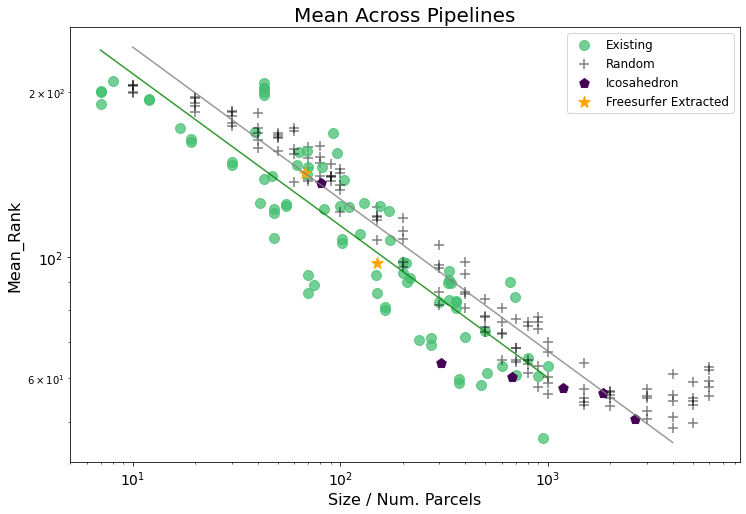

In [4]:
by_type_stats(rank_type='Mean_Rank')

5 -8
Smallest size: 10.0
Largest size: 5000.0
Intercept                                       3.482648e-214
C(Parcellation_Type)[T.Freesurfer Extracted]     6.073142e-01
C(Parcellation_Type)[T.Icosahedron]              5.746026e-01
C(Parcellation_Type)[T.Random]                   1.584854e-06
Size                                            1.601573e-109
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Median_Rank   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     561.6
Date:                Mon, 03 Jan 2022   Prob (F-statistic):          3.42e-108
Time:                        11:24:19   Log-Likelihood:                 270.93
No. Observations:                 207   AIC:                            -531.9
Df Residuals:                     202   BIC:                            -515.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        2.7548      0.017    159.032      0.000       2.721       2.789
C(Parcellation_Type)[T.Freesurfer Extracted]     0.0244      0.047      0.515      0.607      -0.069       0.118
C(Parcellation_Type)[T.Icosahedron]             -0.0160      0.029     -0.562      0.575      -0.072       0.040
C(Parcellation_Type)[T.Random]                   0.0487      0.010      4.947      0.000       0.029       0.068
Size                                            -0.3422      0.007    -46.304      0.000      -0.357      -0.328
==============================================================================
Omnibus:                        1.724   Durbin-Watson:                   1.287
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.574
Skew:                          -0.213   Prob(JB):                        0.455
Kurtosis:                       3.014   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

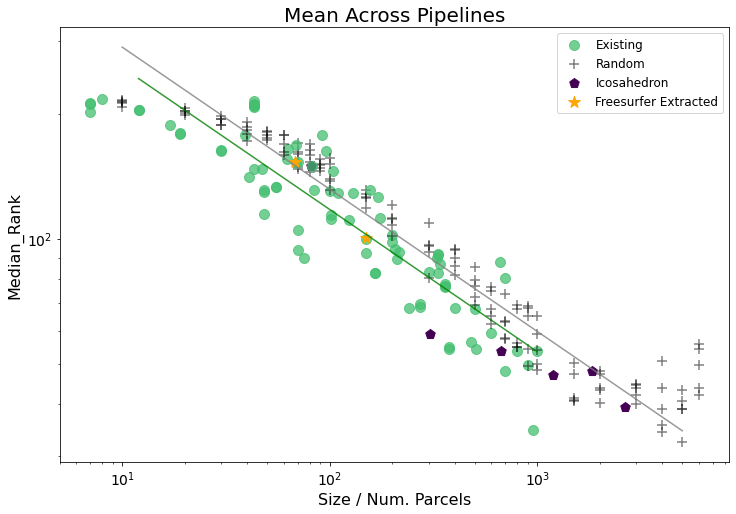

In [5]:
by_type_stats(rank_type='Median_Rank')

14 -18
Smallest size: 20.0
Largest size: 3000.0
Intercept                                       7.906646e-245
C(Parcellation_Type)[T.Freesurfer Extracted]     3.730433e-02
C(Parcellation_Type)[T.Icosahedron]              2.312622e-01
C(Parcellation_Type)[T.Random]                   1.213164e-03
Size                                             6.938020e-37
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Max_Rank   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     68.07
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           3.38e-35
Time:                        11:24:23   Log-Likelihood:                 420.58
No. Observations:                 188   AIC:                            -831.2
Df Residuals:                     183   BIC:                            -815.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        2.4070      0.008    287.023      0.000       2.390       2.424
C(Parcellation_Type)[T.Freesurfer Extracted]     0.0394      0.019      2.098      0.037       0.002       0.076
C(Parcellation_Type)[T.Icosahedron]              0.0136      0.011      1.201      0.231      -0.009       0.036
C(Parcellation_Type)[T.Random]                   0.0132      0.004      3.287      0.001       0.005       0.021
Size                                            -0.0577      0.004    -16.094      0.000      -0.065      -0.051
==============================================================================
Omnibus:                       39.972   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.797
Skew:                          -0.999   Prob(JB):                     2.85e-18
Kurtosis:                       5.515   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

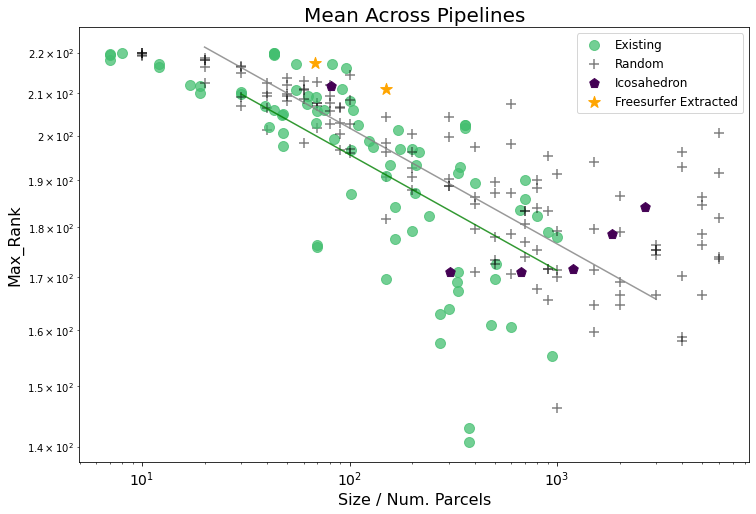

In [6]:
by_type_stats(rank_type='Max_Rank')

3 -23
Smallest size: 8.0
Largest size: 2000.0
Intercept                                       4.627152e-72
C(Parcellation_Type)[T.Freesurfer Extracted]    6.743821e-04
C(Parcellation_Type)[T.Icosahedron]             8.701782e-01
C(Parcellation_Type)[T.Random]                  1.279258e-02
Size                                            1.945529e-44
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Min_Rank   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     91.42
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           4.13e-43
Time:                        11:24:26   Log-Likelihood:                -40.117
No. Observations:                 194   AIC:                             90.23
Df Residuals:                     189   BIC:                             106.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        2.5413      0.087     29.240      0.000       2.370       2.713
C(Parcellation_Type)[T.Freesurfer Extracted]    -0.7463      0.216     -3.457      0.001      -1.172      -0.320
C(Parcellation_Type)[T.Icosahedron]             -0.0231      0.141     -0.164      0.870      -0.301       0.255
C(Parcellation_Type)[T.Random]                   0.1130      0.045      2.513      0.013       0.024       0.202
Size                                            -0.7076      0.038    -18.553      0.000      -0.783      -0.632
==============================================================================
Omnibus:                       29.143   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.203
Skew:                          -0.883   Prob(JB):                     1.13e-09
Kurtosis:                       4.406   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

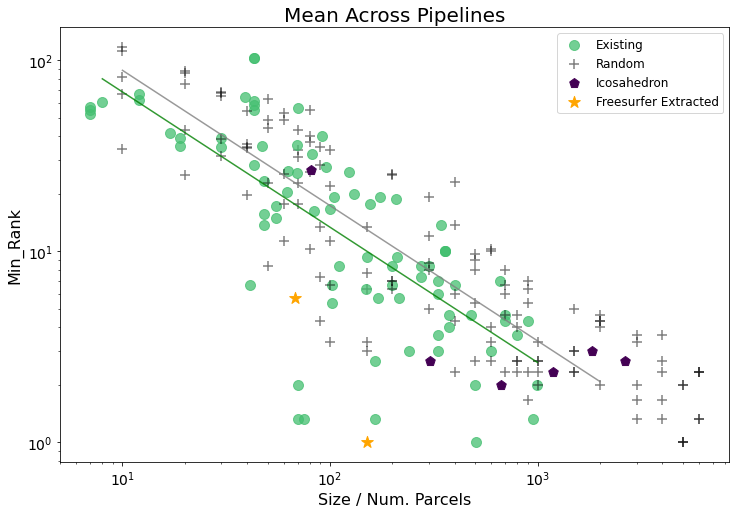

In [7]:
by_type_stats(rank_type='Min_Rank')

In [ ]:
stop

Only the difference between existing and random have enough statistical power.

### Viz just the fits for Existing vs. Random:

### We want to next check if there is a possible interaction between parcellation type and size.

In [ ]:
g = sns.lmplot(y='Mean_Rank', x='Size', data=r_df, hue='Parcellation_Type')

plt.title('LogLog OLS By Parcellation')
plt.savefig('Figures/base_results_fit2.png', dpi=200, bbox_inches='tight')

model = ols('Mean_Rank ~ Size * C(Parcellation_Type)', data=r_df).fit()
save_stats_summary(model, 'base_results2')
print(model.pvalues)
model.summary()

No interactions are signifigant here.


### How does the estimated slope change w/ robust regression?
Next, we will see how the results change when using robust regression and no thresholding, where thresholding = the procedure for selecting the region in which the scaling holds.

In [ ]:
r_df = get_ranks_sizes(results, log=True, **static)

model = rlm('Mean_Rank ~ Size + C(Parcellation_Type)', data=r_df).fit()
print(model.pvalues)
model.summary()

What happens if we restrict the sizes to only 1000 and less?

In [ ]:
r_df = get_ranks_sizes(results, log=True,
                       threshold=True, **static)

r_df = r_df[r_df['Size'] <= np.log10(1000)]

model = ols('Mean_Rank ~ Size + C(Parcellation_Type)', data=r_df).fit()
save_stats_summary(model, 'base_results_1000_and_less')
print(model.pvalues)

model.summary()

# Choice of Pipeline

### Intra-Pipeline Comparison

In [ ]:
intra_pipe_df = get_intra_pipeline_df(results, log=True,
                                      threshold=True, **static).rename({'Model': 'Pipeline'}, axis=1)

# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=intra_pipe_df)
plt.title('Intra-Pipeline Comparison')
plt.savefig('Figures/intra_plot1.png', dpi=200, bbox_inches='tight')

# Run stats
model = ols('Mean_Rank ~ Size * C(Pipeline)', data=intra_pipe_df).fit()
save_stats_summary(model, 'intra_results1')
print(model.pvalues)
model.summary()

### Inter-Pipeline

In [ ]:
# Get df
inter_pipe_df = clean_model_names(
    get_across_ranks(results, models=['svm', 'lgbm', 'elastic'],
                     log=True, **static).rename({'Model': 'Pipeline'}, axis=1))

# Plot
g = sns.lmplot(x='Size', y='Mean_Rank', hue='Pipeline', data=inter_pipe_df)
plt.title('Inter-Pipeline Comparison')
plt.savefig('Figures/inter_plot1.png', dpi=200, bbox_inches='tight')

model = ols('Mean_Rank ~ Size * C(Pipeline)', data=inter_pipe_df).fit()
save_stats_summary(model, 'inter_results1')
print(model.pvalues)
model.summary()

In [ ]:
print('Elastic intercept vs. SVM intercept')
i = model.params.Intercept
i, i+model.params['C(Pipeline)[T.SVM]'], model.pvalues['C(Pipeline)[T.SVM]']

In [ ]:
print('Elastic size coef vs. SVM interaction')
s = model.params.Size
s, s+model.params['Size:C(Pipeline)[T.SVM]'], model.pvalues['Size:C(Pipeline)[T.SVM]']

# Variation Across Target Variable

In [ ]:
r_df = get_ranks_sizes(results, avg_targets=False,
                       log=True, threshold=False, **static)

sns.lmplot(y='Mean_Rank', x='Size', data=r_df)
plt.title('LogLog OLS By Parcellation')

model = ols('Mean_Rank ~ Size', data=r_df).fit()
save_stats_summary(model, 'by_target_table')
print(model.pvalues)
model.summary()

### Calculate IQR at every unique size, then fit a model explaining it in relation to size.

In [ ]:
def v(x):
    rl = x['Mean_Rank']
    return rl.quantile(.75) - rl.quantile(.25)
    
log_size_to_var = r_df.groupby('Size').apply(v)
ls_df = log_size_to_var.to_frame().reset_index().rename(columns={0: 'IQR'})

g = sns.lmplot(y='IQR', x='Size', data=ls_df)
plt.title('Size to IQR')
plt.savefig('Figures/iqr.png', dpi=200, bbox_inches='tight')

model = ols('IQR ~ Size', data=ls_df).fit()
save_stats_summary(model, 'iqr_stats')
print(model.pvalues)
model.summary()

### Compare thresholded R2 at 4000 and less between variation models

In [ ]:
# By Target
r_df = get_ranks_sizes(results, avg_targets=False,
                       log=True, threshold=False, **static)
r_df = r_df[r_df['Size'] <= np.log10(4000)]

model = ols('Mean_Rank ~ Size', data=r_df).fit()
print(model.pvalues)
display(model.summary())

print('')
print('---')
print('')

# Mean
r_df = get_ranks_sizes(results, avg_targets=True, log=True,
                       threshold=False, **static)
r_df = r_df[r_df['Size'] <= np.log10(4000)]

model = ols('Mean_Rank ~ Size', data=r_df).fit()
print(model.pvalues)
display(model.summary())

# Single vs. Multiple Parcellations

## 1. Compare Ensembles to Non-Ensembled Results

In [ ]:
r_df = get_single_vs_multiple_df(results, threshold=False, log=True,
                                 stacked=True,
                                 voted=True, grid=True,
                                 **static).reset_index()

r_df = r_df.rename(columns={'is_ensemble': 'Is_Ensemble'})

# Plot
sns.lmplot(x='Size', y='Mean_Rank', hue='Is_Ensemble', data=r_df)
plt.title('If Ensemble')
plt.savefig('Figures/is_ensemble.png', dpi=200, bbox_inches='tight')

model = ols('Mean_Rank ~ Size * C(Is_Ensemble)', data=r_df).fit()
save_stats_summary(model, 'is_ensemble_stats')
print(model.pvalues)
model.summary()

In [ ]:
model.params.Intercept, model.params.Intercept + model.params['C(Is_Ensemble)[T.1]'], model.pvalues['C(Is_Ensemble)[T.1]']

In [ ]:
model.params.Size, model.params.Size + model.params['Size:C(Is_Ensemble)[T.1]'], model.pvalues['Size:C(Is_Ensemble)[T.1]']

2. Compare Stacked vs. Voted Results

In [ ]:
r_df = get_ranks_sizes(results, stacked=True,
                       voted=True, log=True,
                       threshold=False)

sns.lmplot(x='Size', y='Mean_Rank', hue='Parcellation_Type', data=r_df)
plt.title('Stacked vs. Voted')
plt.savefig('Figures/ensemble_method1.png', dpi=200, bbox_inches='tight')

model = ols('Mean_Rank ~ Size + C(Parcellation_Type)', data=r_df).fit()
save_stats_summary(model, 'ensemble_method1')
print(model.pvalues)
model.summary()

Check for interactions

In [ ]:
model = ols('Mean_Rank ~ Size * C(Parcellation_Type)', data=r_df).fit()
save_stats_summary(model, 'ensemble_method2')
print(model.pvalues)
model.summary()

Check binary and regression only

In [ ]:
r_df = get_ranks_sizes(results, stacked=True,
                       voted=True, log=True,
                       threshold=False, binary_only=True)

sns.lmplot(x='Size', y='Mean_Rank', hue='Parcellation_Type', data=r_df)
plt.title('Stacked vs. Voted - Binary Only')
plt.savefig('Figures/ensemble_method_binary.png', dpi=200, bbox_inches='tight')

model = ols('Mean_Rank ~ Size * C(Parcellation_Type)', data=r_df).fit()
save_stats_summary(model, 'ensemble_method_binary')
print(model.pvalues)
model.summary()

In [ ]:
r_df = get_ranks_sizes(results, stacked=True,
                       voted=True, log=True,
                       threshold=False, regression_only=True)

sns.lmplot(x='Size', y='Mean_Rank', hue='Parcellation_Type', data=r_df)
plt.title('Stacked vs. Voted - Regression Only')
plt.savefig('Figures/ensemble_method_regression.png', dpi=200, bbox_inches='tight')

model = ols('Mean_Rank ~ Size * C(Parcellation_Type)', data=r_df).fit()
save_stats_summary(model, 'ensemble_method_regression')
print(model.pvalues)
model.summary()

### 3. Compare fixed size ensemble to across size ensemble

In [ ]:
r_df = get_ranks_sizes(results, stacked=True,
                       voted=True, log=True,
                       threshold=False, by_group=False).sort_values('Size')
r_df['Across_Sizes'] = [1 if '-' in r else 0 for r in r_df.index]

sns.lmplot(x='Size', y='Mean_Rank', hue='Across_Sizes', data=r_df)
plt.title('Fixed vs. Across Sizes')

model = ols('Mean_Rank ~ Size + C(Across_Sizes)', data=r_df).fit()
save_stats_summary(model, 'fixed_vs_across')
print(model.pvalues)
model.summary()

In [ ]:
# Gen plot
_, ax = plt.subplots(figsize=(12, 8))

# Reverse log10 on size
e_size = 10 ** r_df['Size'][r_df['Across_Sizes'] == 0]
r_size = 10 ** r_df['Size'][r_df['Across_Sizes'] == 1]

e_rank = 10 ** r_df['Mean_Rank'][r_df['Across_Sizes'] == 0]
r_rank = 10 ** r_df['Mean_Rank'][r_df['Across_Sizes'] == 1]

# Get pred fit lines
e_fit = 10 ** model.params.Intercept * (e_size **(model.params.Size))

r_intercept = 10 ** (model.params.Intercept + model.params['C(Across_Sizes)[T.1]'])
r_fit = r_intercept * (r_size **(model.params.Size))

# Plot lines of fit
ax.plot(e_size, e_fit, color='blue', alpha=.8)
ax.plot(r_size, r_fit, color='orange', alpha=.8)

# Scatter points
ax.scatter(e_size, e_rank, color='blue', label='Fixed Sizes')
ax.scatter(r_size, r_rank, color='orange', label='Across Sizes')

# Formatting
ax.set_xscale('log')
ax.set_yscale('log')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_title('Ensemble Fixed vs. Across Sizes', fontsize=20)
plt.legend(fontsize=14)

plt.savefig('Figures/fixed_vs_across.png', dpi=200, bbox_inches='tight')

Check for size interactions on only a subset where they start at the same size

In [ ]:
r_df = get_ranks_sizes(results, stacked=True,
                       voted=True, log=True,
                       threshold=False, by_group=False)
r_df['across_sizes'] = [1 if '-' in r else 0 for r in r_df.index]
r_df = r_df[r_df['Size'] > 2.9]

sns.lmplot(x='Size', y='Mean_Rank', hue='across_sizes', data=r_df)
plt.title('Fixed vs. Across Sizes')
plt.savefig('Figures/fixed_vs_across2.png', dpi=200, bbox_inches='tight')

model = ols('Mean_Rank ~ Size * C(across_sizes)', data=r_df).fit()
save_stats_summary(model, 'fixed_vs_across2')
print(model.pvalues)
model.summary()

4. Compare ‘Grid’ results to just random single parcellation results

In [ ]:
r_df = get_ranks_sizes(results, grid=True, random=True,
                       threshold=False, by_group=True, log=True)

# Get only random parcellations of the same size
g_sizes = r_df[r_df['Parcellation_Type'] == 'Grid']['Size']
g_max = g_sizes.max()
g_min = g_sizes.min()
print('restrict to:', round(10 ** g_min), round(10 ** g_max))
r_df = r_df[(r_df['Size'] >= g_min) & (r_df['Size'] <= g_max)]

d_df = r_df.rename(columns={'Mean_Rank': 'Mean Rank (log10)', 'Size': 'Size (log10)'})
sns.lmplot(x='Size (log10)', y='Mean Rank (log10)', hue='Parcellation_Type', data=d_df)
plt.title('Grid vs. Random')
plt.savefig('Figures/grid_vs_random.png', dpi=200, bbox_inches='tight')

model = ols('Mean_Rank ~ Size * C(Parcellation_Type)', data=r_df).fit()
save_stats_summary(model, 'grid_vs_random')
print(model.pvalues)
model.summary()

# Highest Performance

 Inter pipeline ensemble results, to show that SVM based ensembles outperform other pipelines, use as justification for including them in Figure 6.

In [ ]:
inter_pipe_df = get_across_ranks(results, models=['svm', 'lgbm', 'elastic'],
                                 log=True, stacked=True, voted=True)
d_df = clean_model_names(clean_col_names(inter_pipe_df))

# Plot
sns.lmplot(x='Size', y='Mean Rank', hue='Pipeline', data=d_df)
plt.title('Inter-Pipe Ensembles (just base pipelines)')
plt.savefig('Figures/ensemble_inter_pipe_stats.png', dpi=200, bbox_inches='tight')

inter_pipe_df = clean_model_names(inter_pipe_df).rename({'Model': 'Pipeline'}, axis=1)

# Model
model = ols('Mean_Rank ~ Size * C(Pipeline)', data=inter_pipe_df).fit()
save_stats_summary(model, 'ensemble_inter_pipe_stats')
print(model.pvalues)
model.summary()

In [ ]:
# get DF
r_df = get_highest_performing_df(results)


# Setup for plot
r_df = r_df.reset_index()
r_df['Mean_Rank'] = np.log10(r_df['Mean_Rank'])
r_df['Size'] = np.log10(r_df['Size'])

sns.lmplot(y='Mean_Rank', x='Size', data=r_df, hue='Model')

# Model
model = ols('Mean_Rank ~ Size + C(Model)', data=r_df).fit()
print(model.pvalues)
model.summary()